In [80]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [81]:
# Load the dataset
data=pd.read_csv('Educational Data.csv')

In [82]:
# Display the first 5 rows of the dataset
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [83]:
#Check the shape of the dataset (number of rows and columns)
data.shape

(480, 17)

In [84]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [85]:
#descriptive statistics
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [86]:
#Identify missing values
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

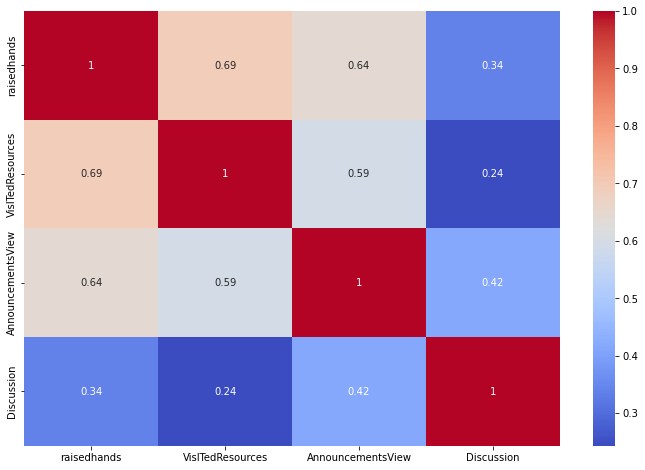

In [87]:
#Finding the correlation between features of the dataset and plotting the heatmap for 
correlation= data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

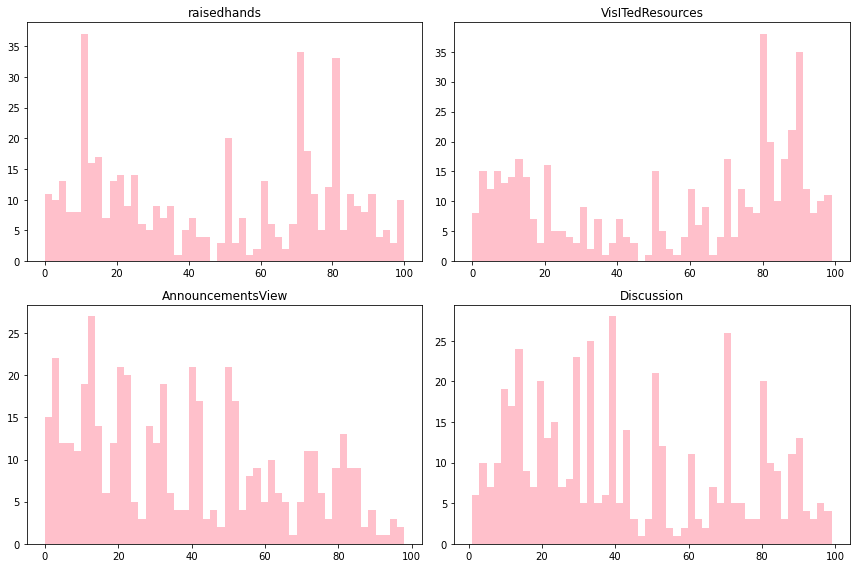

In [88]:
#Data Visualization

# Specify the columns to plot
columns_to_plot = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot histograms for each column
for idx, column in enumerate(columns_to_plot):
    axes[idx].hist(data[column], bins=50, color='pink')
    axes[idx].set_title(column)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()


In [89]:
#Categorical and Ordinal Data Division

# Columns that contain ordinal categorical data
categorical_ordinal_columns = ['StageID', 'GradeID', 'StudentAbsenceDays', 'Semester']

# Columns that contain nominal categorical data
categorical_nominal_columns = ['gender', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'Topic']


In [90]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder for ordinal features
ord_enc = OrdinalEncoder()

# Encode ordinal categorical columns
data[categorical_ordinal_columns] = ord_enc.fit_transform(data[categorical_ordinal_columns])

# Define the correct order for 'Class' values
class_order = [['L', 'M', 'H']]

# Initialize OrdinalEncoder with custom order for 'Class'
class_enc = OrdinalEncoder(categories=class_order)

# Encode the 'Class' column
data['Class'] = class_enc.fit_transform(data[['Class']])

# Retrieve categories for reference
class_categories = class_enc.categories_


In [71]:
#Encoding for Nominal Data
# Initialize OneHotEncoder with dense output
ohe = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the nominal columns
encoded_array = ohe.fit_transform(data[nominal_cols])

# Convert the encoded array into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(nominal_cols))

# Remove the original nominal columns from the DataFrame
data.drop(nominal_cols, axis=1, inplace=True)

# Add the new one-hot encoded columns to the DataFrame
data = pd.concat([data, encoded_df], axis=1)

In [72]:
data.drop(columns_to_drop, axis=1, inplace=True)

In [73]:
# Dropping the target attribute
X = data.drop(columns=['Class'])
y = data['Class']

In [74]:
# Splitting the data to a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

In [91]:
# Initialize the Logistic Regression model with a high maximum number of iterations
log_reg = LogisticRegression(max_iter=100000)

# Train the Logistic Regression model on the training data
log_reg.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100

# Output the performance metrics
print(f"Logistic Regression Accuracy: {accuracy:.2f}%")
print(f"Logistic Regression Precision: {precision:.2f}%")
print(f"Logistic Regression Recall: {recall:.2f}%")


Logistic Regression Accuracy: 77.08%
Logistic Regression Precision: 78.40%
Logistic Regression Recall: 77.11%


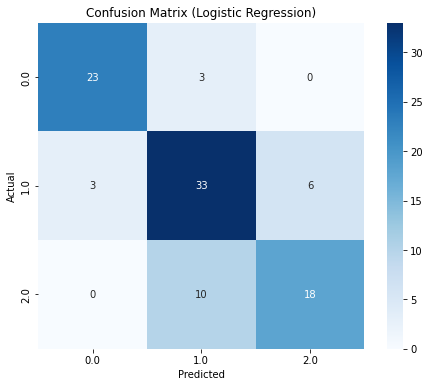

In [92]:
# Compute the confusion matrix for the Logistic Regression predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a figure for the heatmap
plt.figure(figsize=(8, 6))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=log_reg.classes_,  # Predicted class labels (x-axis)
            yticklabels=log_reg.classes_)  # Actual class labels (y-axis)

# Label the x-axis
plt.xlabel('Predicted')  # Predicted class label

# Label the y-axis
plt.ylabel('Actual')  # Actual class label

# Add a title to the plot
plt.title('Confusion Matrix (Logistic Regression)')

# Show the heatmap
plt.show()

In [93]:
# Initialize the Random Forest Classifier with a fixed random state
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf, average='macro') * 100
recall_rf = recall_score(y_test, y_pred_rf, average='macro') * 100

# Output the performance metrics
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")
print(f"Random Forest Precision: {precision_rf:.2f}%")
print(f"Random Forest Recall: {recall_rf:.2f}%")


Random Forest Accuracy: 83.33%
Random Forest Precision: 87.50%
Random Forest Recall: 81.68%


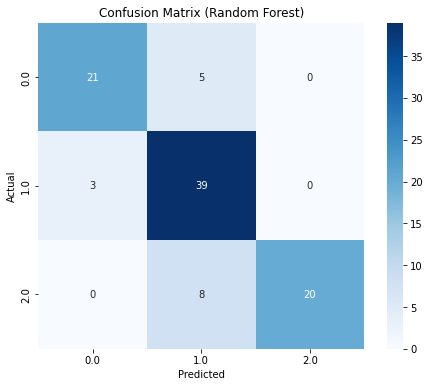

In [94]:
# Compute the confusion matrix for the Random Forest predictions
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a figure for the heatmap
plt.figure(figsize=(8, 6))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=rf_clf.classes_,  # Predicted class labels (x-axis)
            yticklabels=rf_clf.classes_)  # Actual class labels (y-axis)

# Label the x-axis
plt.xlabel('Predicted')  # Predicted class label

# Label the y-axis
plt.ylabel('Actual')  # Actual class label

# Add a title to the plot
plt.title('Confusion Matrix (Random Forest)')

# Show the heatmap
plt.show()